In [21]:
import pandas as pd
import matplotlib.pyplot as plt



# Assuming your CSV file is named 'data.csv' and is located in the same directory as your script
df = pd.read_csv('30-7.csv')

# Display the first few rows of the DataFrame
print(df.head())


   Producto  CMG       CTME
0      8.20  108  63.491118
1      7.39   82  60.082624
2      7.68   91  61.079832
3      9.88  175  76.436474
4      5.65   43  59.861861


In [22]:
pro = df['Producto']
cm = df['CMG']
ct = df['CTME']


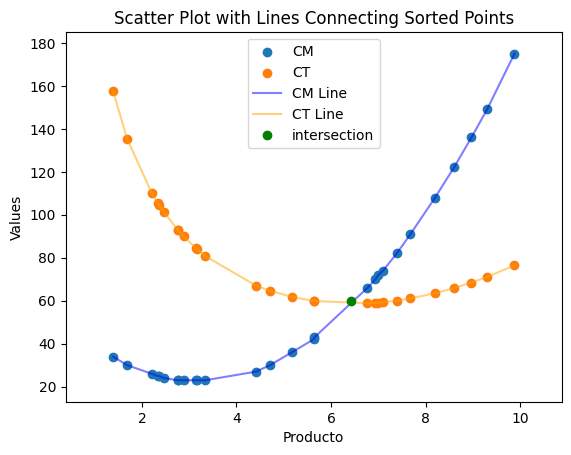

Intersection at: (6.1460229868747325, 73.45400299243116)


In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
pro = np.array([8.2, 7.39, 7.68, 9.88, 5.65, 7.1, 5.17, 3.34, 5.63, 1.39, 9.3, 2.21, 2.88, 6.94, 3.17, 2.36, 2.33, 2.76, 8.97, 2.77, 3.14, 2.47, 6.77, 7, 1.69, 4.41, 8.6, 4.71])
cm = np.array([108, 82, 91, 175, 43, 74, 36, 23, 42, 34, 149, 26, 23, 70, 23, 25, 25, 23, 136, 23, 23, 24, 66, 72, 30, 27, 122, 30])
ct = np.array([63.49, 60.08, 61.08, 76.44, 59.86, 59.34, 61.79, 80.77, 59.92, 157.50, 71.11, 110.03, 90.06, 59.05, 83.89, 104.66, 105.68, 92.97, 68.47, 92.72, 84.48, 101.10, 58.83, 59.15, 135.25, 67.07, 65.87, 64.63])

# Sort points by their x-values (pro)
sorted_indices = np.argsort(pro)
sorted_pro = pro[sorted_indices]
sorted_cm = cm[sorted_indices]
sorted_ct = ct[sorted_indices]

# Plotting
plt.scatter(pro, cm, label='CM')
plt.scatter(pro, ct, label='CT')

plt.plot(sorted_pro, sorted_cm, linestyle='-', color='blue', alpha=0.5, label='CM Line')
plt.plot(sorted_pro, sorted_ct, linestyle='-', color='orange', alpha=0.5, label='CT Line')

# Plot the intersection point
plt.plot(6.43, 60, 'go', label = 'intersection')


#Intersection at: (6.1460229868747325, 73.45400299243116)

# Add labels and title
plt.xlabel('Producto')
plt.ylabel('Values')
plt.title('Scatter Plot with Lines Connecting Sorted Points')

# Add legend
plt.legend()

# Set axis limits to zoom out
plt.xlim(min(pro) - 1, max(pro) + 1)
plt.ylim(min(min(cm), min(ct)) - 10, max(max(cm), max(ct)) + 10)

# Show plot
plt.show()

# Print intersection point
print(f"Intersection at: ({intersection[0]}, {intersection[1]})")


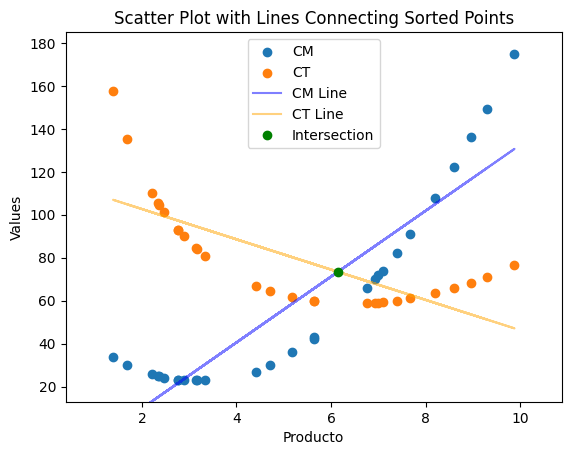

Intersection at: (6.1460229868747325, 73.45400299243116)


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
pro = np.array([8.2, 7.39, 7.68, 9.88, 5.65, 7.1, 5.17, 3.34, 5.63, 1.39, 9.3, 2.21, 2.88, 6.94, 3.17, 2.36, 2.33, 2.76, 8.97, 2.77, 3.14, 2.47, 6.77, 7, 1.69, 4.41, 8.6, 4.71])
cm = np.array([108, 82, 91, 175, 43, 74, 36, 23, 42, 34, 149, 26, 23, 70, 23, 25, 25, 23, 136, 23, 23, 24, 66, 72, 30, 27, 122, 30])
ct = np.array([63.49, 60.08, 61.08, 76.44, 59.86, 59.34, 61.79, 80.77, 59.92, 157.50, 71.11, 110.03, 90.06, 59.05, 83.89, 104.66, 105.68, 92.97, 68.47, 92.72, 84.48, 101.10, 58.83, 59.15, 135.25, 67.07, 65.87, 64.63])

# Reshape data for fitting
X = pro.reshape(-1, 1)

# Fit linear models
model_cm = LinearRegression().fit(X, cm)
model_ct = LinearRegression().fit(X, ct)

# Predict values
cm_pred = model_cm.predict(X)
ct_pred = model_ct.predict(X)

# Get the parameters of the lines
slope_cm = model_cm.coef_[0]
intercept_cm = model_cm.intercept_

slope_ct = model_ct.coef_[0]
intercept_ct = model_ct.intercept_

# Calculate intersection
def calculate_intersection(m1, b1, m2, b2):
    if m1 == m2:  # Parallel lines
        return None
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

intersection = calculate_intersection(slope_cm, intercept_cm, slope_ct, intercept_ct)

# Plotting
plt.scatter(pro, cm, label='CM')
plt.scatter(pro, ct, label='CT')

# Plot the lines
plt.plot(pro, cm_pred, linestyle='-', color='blue', alpha=0.5, label='CM Line')
plt.plot(pro, ct_pred, linestyle='-', color='orange', alpha=0.5, label='CT Line')

# Plot the intersection point
if intersection:
    plt.plot(intersection[0], intersection[1], 'go', label='Intersection')

# Add labels and title
plt.xlabel('Producto')
plt.ylabel('Values')
plt.title('Scatter Plot with Lines Connecting Sorted Points')

# Add legend
plt.legend()

# Set axis limits to zoom out
plt.xlim(min(pro) - 1, max(pro) + 1)
plt.ylim(min(min(cm), min(ct)) - 10, max(max(cm), max(ct)) + 10)

# Show plot
plt.show()

# Print intersection point
if intersection:
    print(f"Intersection at: ({intersection[0]}, {intersection[1]})")
else:
    print("The lines are parallel or coincident and do not intersect.")
